# Project 6
* Breast cancer prediction
* Author: Vaishnav Krishna P
* Data set is taken from the kaggle website
* https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset/

## About Dataset
* Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df = pd.read_csv("Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<Axes: >

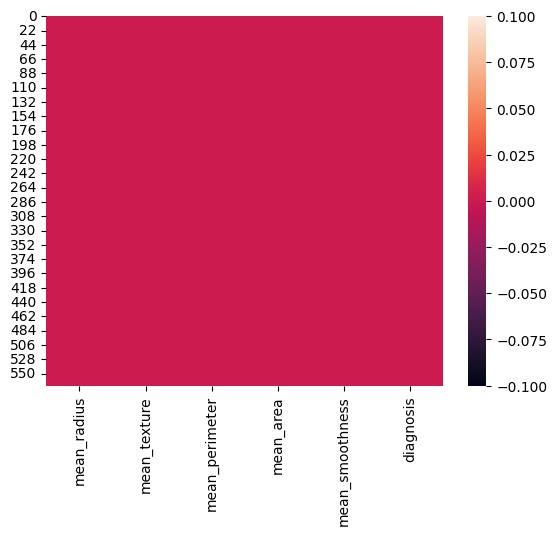

In [ ]:
sns.heatmap(df.isnull())

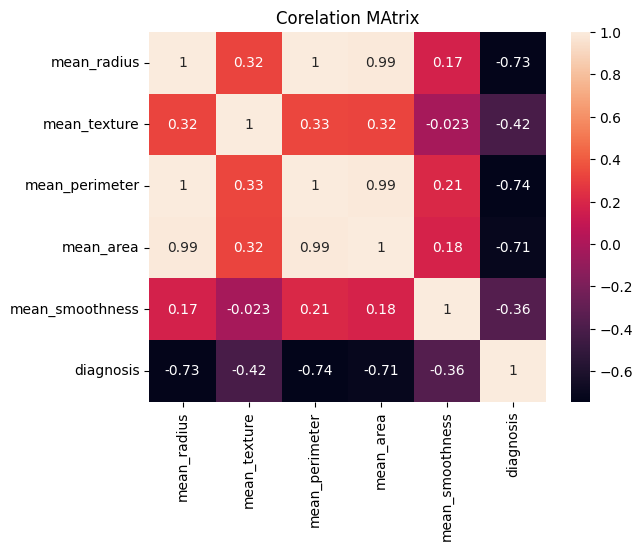

In [ ]:
plt.title("Corelation MAtrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

* observations
- meanradius and and mean area is highly corelated(multicolnear features)
- meanpreimter and mean radius is also a multicolnear features
- mean_area and mean perimeter is also a multicolnear features

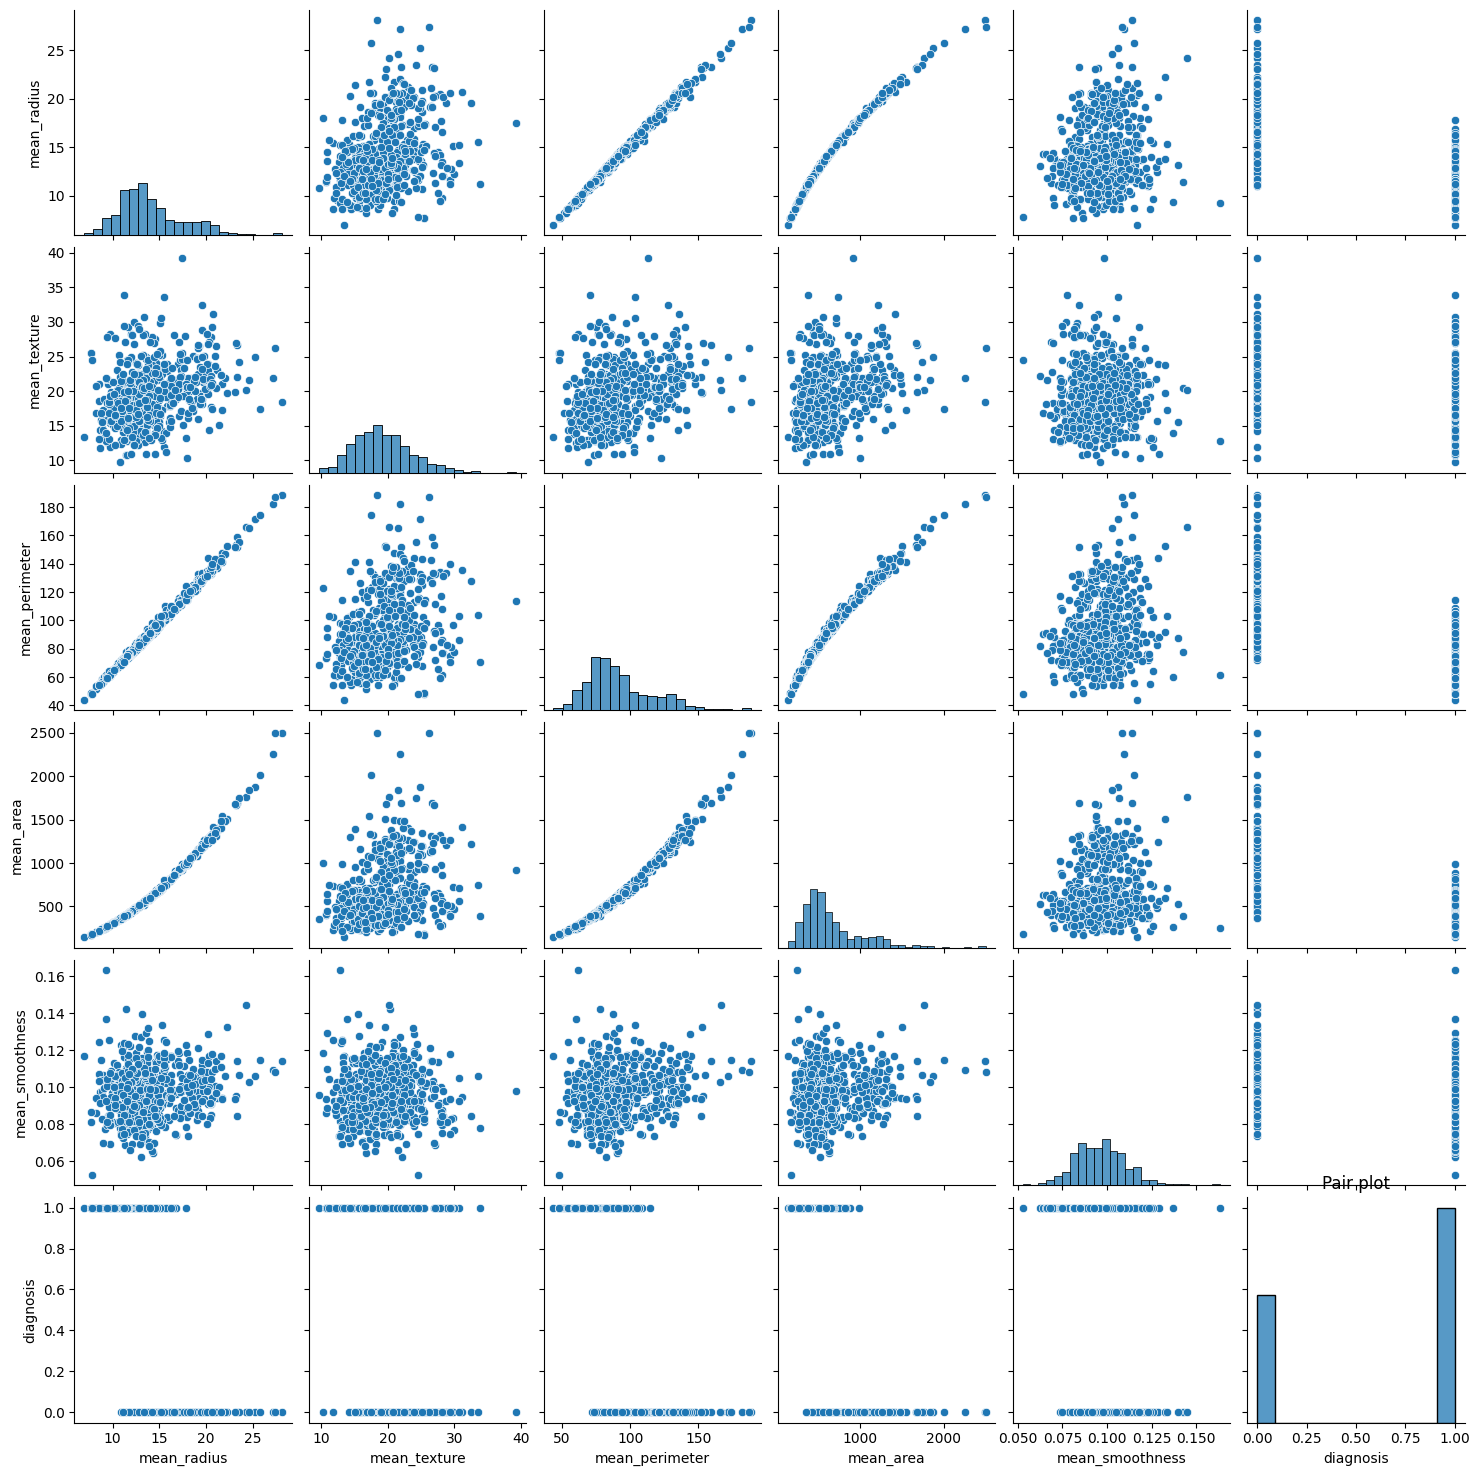

In [ ]:
sns.pairplot(df)
plt.title("Pair plot")
plt.show()

In [ ]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

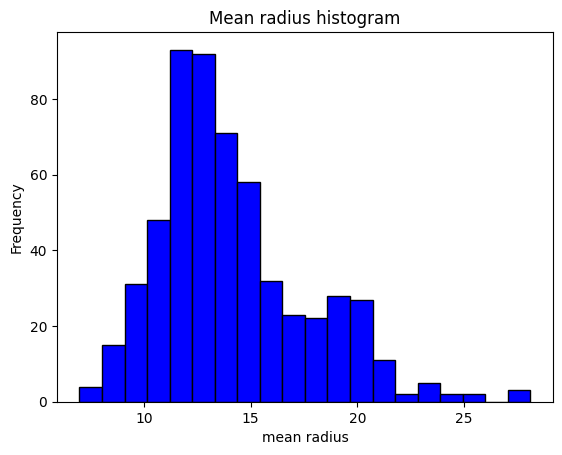

In [ ]:
plt.title("Mean radius histogram")
df["mean_radius"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.xlabel("mean radius")
plt.show()

<Figure size 640x480 with 0 Axes>

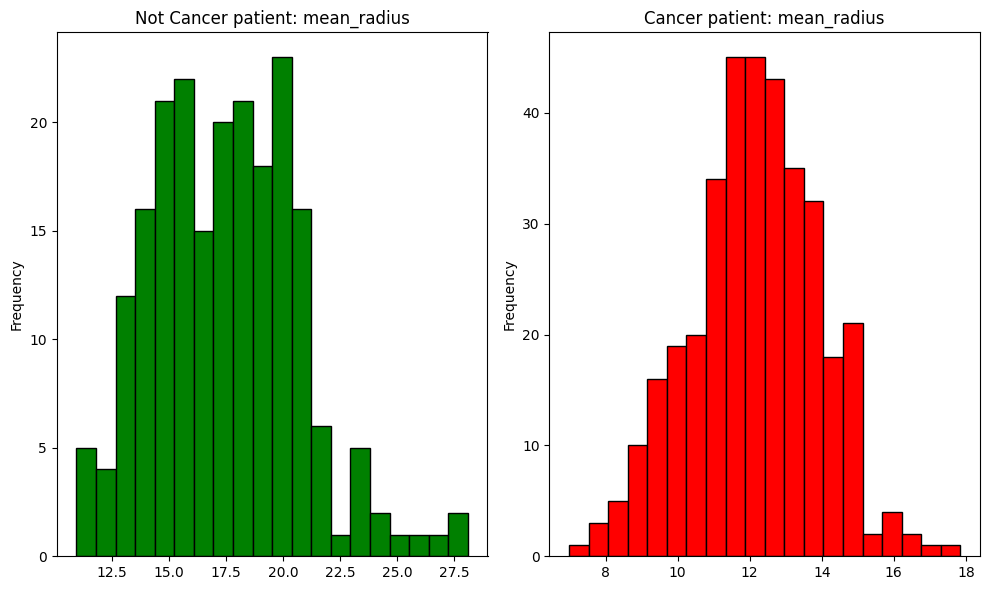

In [ ]:
# Lets analyse the frequancy difference of people infected with Cancer and not effected
plt.suptitle("Mean Radius")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Not Cancer patient: mean_radius")
df["mean_radius"][df['diagnosis'] == 0].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Cancer patient: mean_radius")
df["mean_radius"][df['diagnosis'] == 1].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

* observation
* person with the mean radius in the range of 11-14 have a high chance of getting cancer


In [ ]:
# it is very clear from the histogram that the person infected with the cancer, the distribution is more at value 12.
# so if the value is range of 10-14 there is high chance of being cancer
df["mean_radius"][df['diagnosis'] == 1].mean()

12.146523809523808

In [ ]:
df["mean_radius"].corr(df["diagnosis"])

-0.7300285113754558

In [ ]:
df.shape

(569, 6)

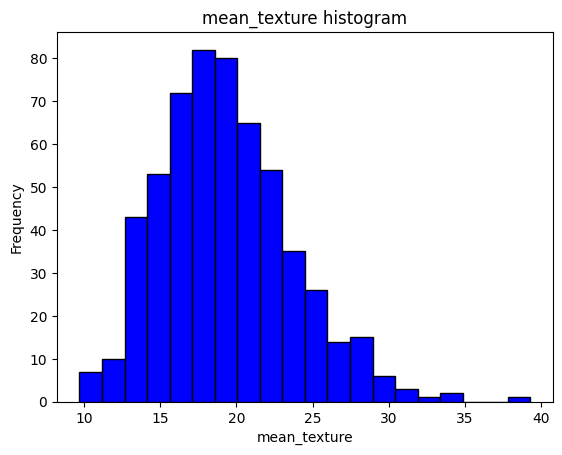

In [ ]:
plt.title("mean_texture histogram")
df["mean_texture"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.xlabel("mean_texture")
plt.show()

In [ ]:
df["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<Figure size 640x480 with 0 Axes>

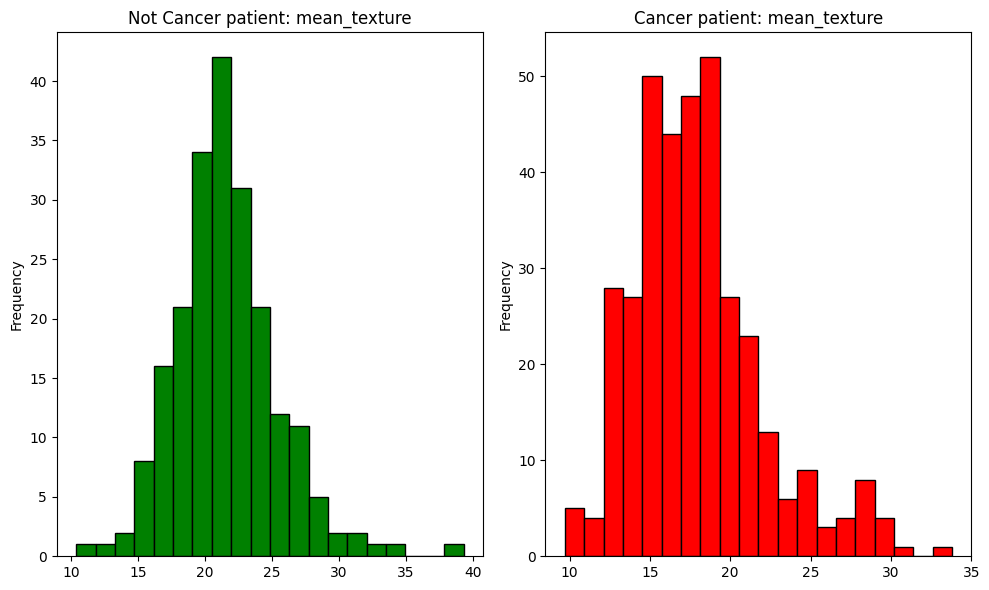

In [ ]:
# Lets analyse the frequancy difference of people infected with Cancer and not effected
plt.suptitle("mean_texture")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Not Cancer patient: mean_texture")
df["mean_texture"][df['diagnosis'] == 0].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Cancer patient: mean_texture")
df["mean_texture"][df['diagnosis'] == 1].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

* observation
* person with mean texture in the range of 15-20 has the higher chance of getting cancer

<Figure size 640x480 with 0 Axes>

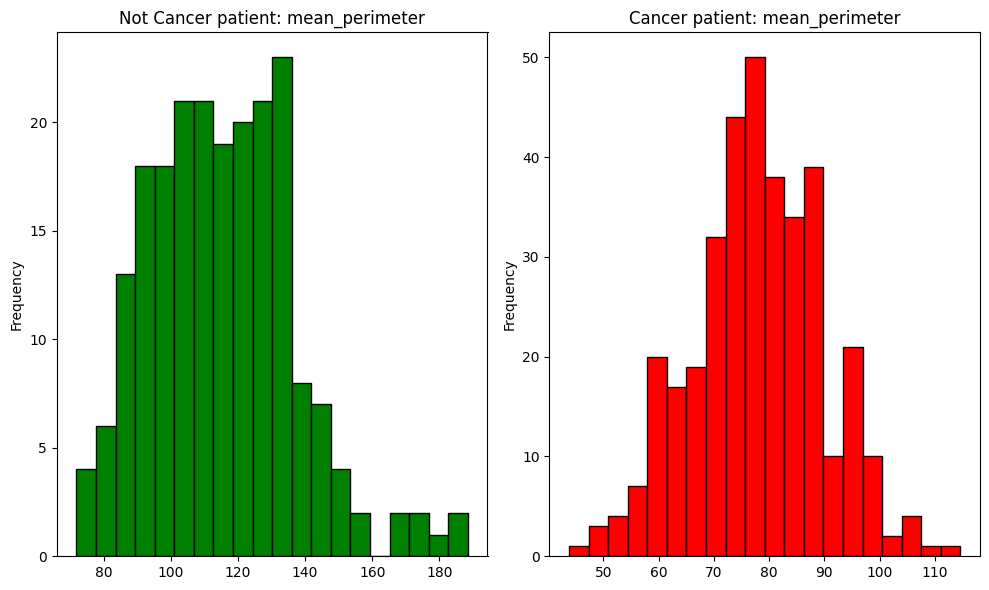

In [ ]:
plt.suptitle("mean_perimeter")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Not Cancer patient: mean_perimeter")
df["mean_perimeter"][df['diagnosis'] == 0].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Cancer patient: mean_perimeter")
df["mean_perimeter"][df['diagnosis'] == 1].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

* observation
* person with mean perimeter in the range of 70-90 has the higher chance of getting cancer

<Figure size 640x480 with 0 Axes>

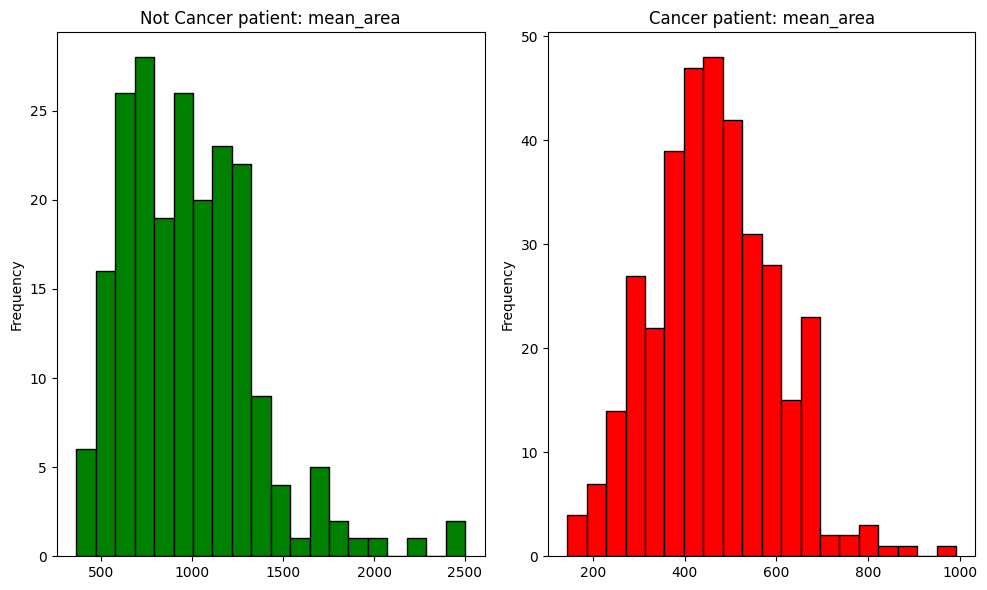

In [ ]:
plt.suptitle("mean_area")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Not Cancer patient: mean_area")
df["mean_area"][df['diagnosis'] == 0].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Cancer patient: mean_area")
df["mean_area"][df['diagnosis'] == 1].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

* observation
* person with mean area in the range of 400-600 has the higher chance of getting cancer

<Figure size 640x480 with 0 Axes>

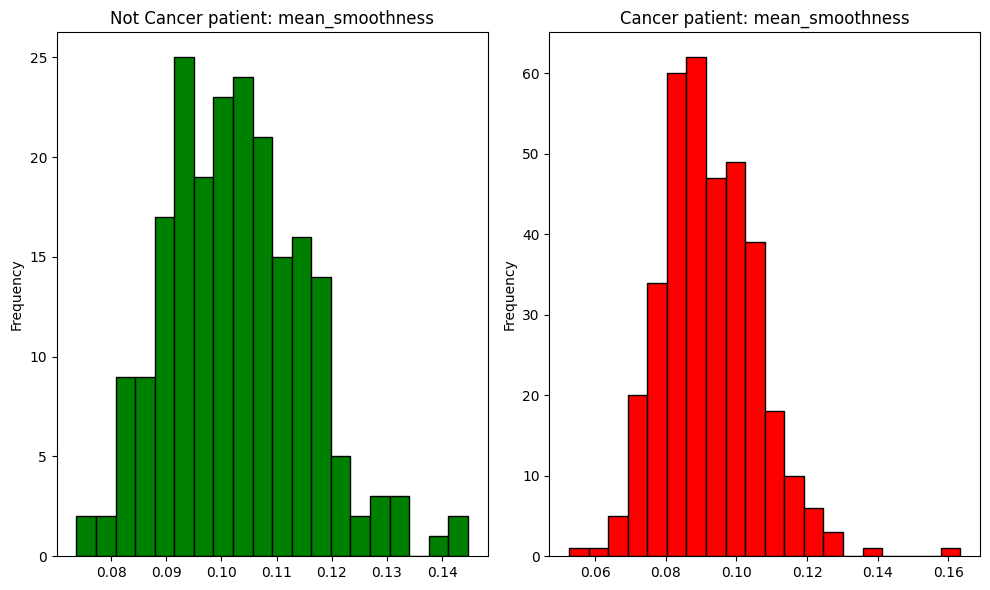

In [ ]:
plt.suptitle("mean_smoothness")
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Not Cancer patient: mean_smoothness")
df["mean_smoothness"][df['diagnosis'] == 0].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Cancer patient: mean_smoothness")
df["mean_smoothness"][df['diagnosis'] == 1].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

* observation
* person with mean smoothness in the range of 0.08-0.11 has the higher chance of getting cancer

In [ ]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [ ]:
# removing the multicolenar features
df.drop(columns=["mean_area","mean_radius"],inplace=True)

In [ ]:
df.head()

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,10.38,122.80,0.11840,0
1,17.77,132.90,0.08474,0
2,21.25,130.00,0.10960,0
3,20.38,77.58,0.14250,0
4,14.34,135.10,0.10030,0


In [ ]:
X = df.drop(columns=["diagnosis"]) # splitting the features and target feature
Y = df["diagnosis"]

In [ ]:
X.head()

,mean_texture,mean_perimeter,mean_smoothness
0,10.38,122.80,0.11840
1,17.77,132.90,0.08474
2,21.25,130.00,0.10960
3,20.38,77.58,0.14250
4,14.34,135.10,0.10030


In [ ]:
X.shape,Y.shape

((569, 3), (569,))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [ ]:
X_train.shape

(398, 3)

In [ ]:
X_test.shape

(171, 3)

In [ ]:
Y_train.shape

(398,)

In [ ]:
Y_test.shape

(171,)

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy score" ,accuracy_score(y_pred,Y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred,Y_test)) #  0.9361702127659575

Accuracy score 0.9181286549707602
Confusion Matrix: 
 [[ 54   5]
 [  9 103]]


In [ ]:
model = GaussianNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy score" ,accuracy_score(y_pred,Y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred,Y_test)) #  0.9361702127659575

Accuracy score 0.9590643274853801
Confusion Matrix: 
 [[ 56   0]
 [  7 108]]


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy score" ,accuracy_score(y_pred,Y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred,Y_test)) # 0.898936170212766

Accuracy score 0.8830409356725146
Confusion Matrix: 
 [[53 10]
 [10 98]]


In [ ]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy score" ,accuracy_score(y_pred,Y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred,Y_test)) # 0.9521276595744681

Accuracy score 0.9473684210526315
Confusion Matrix: 
 [[ 59   5]
 [  4 103]]


In [ ]:
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy score" ,accuracy_score(y_pred,Y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred,Y_test)) # 0.8936170212765957

Accuracy score 0.9239766081871345
Confusion Matrix: 
 [[ 50   0]
 [ 13 108]]
